In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"da850ec3-f15e-444e-b46e-072cde488f1f\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Base Crude Data to TS File Join\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:


pip install pandas-datareader yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"url\",\"sheet_name\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd

url = 'https://github.com/alexbernal0/QEP/raw/main/Crude.xlsx'
sheet_name = 'Trades List'

df = pd.read_excel(url, sheet_name=sheet_name)

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['#','Signal', 'Date/Time','Price', 'Profit/Loss']]

# Add a new column called 'Exit Date/Time' with the same data as 'Date/Time'
df['Exit Date/Time'] = df['Date/Time']

# Shift the contents of the 'Exit Date/Time' column up one row
df['Exit Date/Time'] = df['Exit Date/Time'].shift(-1)

#Shift the contents of the 'Profit/Loss' column up one row
df['Profit/Loss'] = df['Profit/Loss'].shift(-1)

# Add a new column called 'Exit Date/Time' with the same data as 'Date/Time'
df['ExitPrice'] = df['Price']

# Shift the contents of the 'Exit Date/Time' column up one row
df['ExitPrice'] = df['ExitPrice'].shift(-1)

# Drop all rows where there is a NaN in the '#' column
df = df.dropna(subset=['#'])

df['Date'] = df['Date/Time']

# convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Switch places of 'Profit/Loss' and 'closedDate' columns
df = df[['#', 'Signal', 'Date','Price', 'Exit Date/Time','ExitPrice', 'Profit/Loss']]

df.head()

# 
 Signal 
 Date 
 Price 
 Exit Date/Time 
 ExitPrice 
 Profit/Loss 
 
 
 
 
 0 
 1.0 
 Buy 
 2013-05-28 
 104.66 
 2013-05-30 
 103.26 
 -14000.0 
 
 
 2 
 2.0 
 Short 
 2013-05-30 
 103.26 
 2013-06-07 
 105.68 
 -24200.0 
 
 
 4 
 3.0 
 Buy 
 2013-06-07 
 105.68 
 2013-06-24 
 104.56 
 -11200.0 
 
 
 6 
 4.0 
 Short 
 2013-06-24 
 104.56 
 2013-06-28 
 105.94 
 -13800.0 
 
 
 8 
 5.0 
 Buy 
 2013-06-28 
 105.94 
 2013-07-31 
 114.54 
 86000.0

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"file_path\",\"df2\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd

# specify the file path
file_path = 'https://raw.githubusercontent.com/alexbernal0/QEP/main/CrudeData.txt'

# read in the data with comma delimiter
df2 = pd.read_csv(file_path, delimiter=',', usecols=['Date', 'Open'])

# convert the date format
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%Y-%m-%d')

# convert the 'date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# display the first few rows of the dataframe
df2.head()

Date 
 Open 
 
 
 
 
 0 
 2013-03-27 
 106.41 
 
 
 1 
 2013-03-28 
 106.91 
 
 
 2 
 2013-03-29 
 107.46 
 
 
 3 
 2013-04-01 
 107.59 
 
 
 4 
 2013-04-02 
 107.23

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df_joined\",\"pd\",\"df\",\"df2\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# perform the left join on the 'Date' column
df_joined = pd.merge(df, df2, on='Date', how='left')

df_joined.head(20)

# 
 Signal 
 Date 
 Price 
 Exit Date/Time 
 ExitPrice 
 Profit/Loss 
 Open 
 
 
 
 
 0 
 1.0 
 Buy 
 2013-05-28 
 104.66 
 2013-05-30 
 103.26 
 -14000.0 
 103.54 
 
 
 1 
 2.0 
 Short 
 2013-05-30 
 103.26 
 2013-06-07 
 105.68 
 -24200.0 
 102.54 
 
 
 2 
 3.0 
 Buy 
 2013-06-07 
 105.68 
 2013-06-24 
 104.56 
 -11200.0 
 104.37 
 
 
 3 
 4.0 
 Short 
 2013-06-24 
 104.56 
 2013-06-28 
 105.94 
 -13800.0 
 103.23 
 
 
 4 
 5.0 
 Buy 
 2013-06-28 
 105.94 
 2013-07-31 
 114.54 
 86000.0 
 106.19 
 
 
 5 
 6.0 
 Short 
 2013-07-31 
 114.54 
 2013-08-01 
 117.40 
 -28600.0 
 112.66 
 
 
 6 
 7.0 
 Buy 
 2013-08-01 
 117.40 
 2013-08-08 
 112.91 
 -44900.0 
 114.77 
 
 
 7 
 8.0 
 Short 
 2013-08-08 
 112.91 
 2013-08-13 
 116.34 
 -34300.0 
 113.69 
 
 
 8 
 9.0 
 Buy 
 2013-08-13 
 116.34 
 2013-08-22 
 114.68 
 -16600.0 
 115.66 
 
 
 9 
 10.0 
 Short 
 2013-08-22 
 114.68 
 2013-08-26 
 115.57 
 -8900.0 
 113.51 
 
 
 10 
 11.0 
 Buy 
 2013-08-26 
 115.57 
 2013-09-17 
 115.07 
 -5000.0 
 116.56 
 
 
 11 
 12.0 
 Short 
 2013-09-17 
 115.07 
 2013-12-04 
 106.60 
 84700.0 
 115.87 
 
 
 12 
 13.0 
 Buy 
 2013-12-04 
 106.60 
 2014-01-03 
 103.07 
 -35300.0 
 106.30 
 
 
 13 
 14.0 
 Short 
 2014-01-03 
 103.07 
 2014-01-23 
 106.29 
 -32200.0 
 104.58 
 
 
 14 
 15.0 
 Buy 
 2014-01-23 
 106.29 
 2014-03-11 
 109.33 
 30400.0 
 105.66 
 
 
 15 
 16.0 
 Short 
 2014-03-11 
 109.33 
 2014-03-27 
 111.40 
 -20700.0 
 110.24 
 
 
 16 
 17.0 
 Buy 
 2014-03-27 
 111.40 
 2014-04-28 
 111.89 
 4900.0 
 110.42 
 
 
 17 
 18.0 
 Short 
 2014-04-28 
 111.89 
 2014-05-14 
 113.42 
 -15300.0 
 111.54 
 
 
 18 
 19.0 
 Buy 
 2014-05-14 
 113.42 
 2014-07-03 
 115.97 
 25500.0 
 112.96 
 
 
 19 
 20.0 
 Short 
 2014-07-03 
 115.97 
 2014-07-23 
 116.21 
 -2400.0 
 116.18

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df3\",\"df2\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# second Join for the exit
df3 = df2
df3['Exit Date/Time'] = df3['Date']
# Switch places of 'Profit/Loss' and 'closedDate' columns
df3 = df3[['Exit Date/Time','Open']]

df3.head()

Exit Date/Time 
 Open 
 
 
 
 
 0 
 2013-03-27 
 106.41 
 
 
 1 
 2013-03-28 
 106.91 
 
 
 2 
 2013-03-29 
 107.46 
 
 
 3 
 2013-04-01 
 107.59 
 
 
 4 
 2013-04-02 
 107.23

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df_joined2\",\"pd\",\"df_joined\",\"df3\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# perform the left join on the 'Date' column
df_joined2 = pd.merge(df_joined, df3, on='Exit Date/Time', how='left')

df_joined2

# 
 Signal 
 Date 
 Price 
 Exit Date/Time 
 ExitPrice 
 Profit/Loss 
 Open_x 
 Open_y 
 
 
 
 
 0 
 1.0 
 Buy 
 2013-05-28 
 104.66 
 2013-05-30 
 103.26 
 -14000.0 
 103.54 
 102.54 
 
 
 1 
 2.0 
 Short 
 2013-05-30 
 103.26 
 2013-06-07 
 105.68 
 -24200.0 
 102.54 
 104.37 
 
 
 2 
 3.0 
 Buy 
 2013-06-07 
 105.68 
 2013-06-24 
 104.56 
 -11200.0 
 104.37 
 103.23 
 
 
 3 
 4.0 
 Short 
 2013-06-24 
 104.56 
 2013-06-28 
 105.94 
 -13800.0 
 103.23 
 106.19 
 
 
 4 
 5.0 
 Buy 
 2013-06-28 
 105.94 
 2013-07-31 
 114.54 
 86000.0 
 106.19 
 112.66 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 144 
 145.0 
 Buy 
 2023-01-13 
 80.54 
 2023-02-01 
 76.82 
 -37200.0 
 79.00 
 79.47 
 
 
 145 
 146.0 
 Short 
 2023-02-01 
 76.82 
 2023-02-13 
 80.55 
 -37300.0 
 79.47 
 80.35 
 
 
 146 
 147.0 
 Buy 
 2023-02-13 
 80.55 
 2023-02-20 
 77.58 
 -29700.0 
 80.35 
 NaN 
 
 
 147 
 148.0 
 Short 
 2023-02-20 
 77.58 
 2023-03-03 
 79.85 
 -22700.0 
 NaN 
 78.06 
 
 
 148 
 149.0 
 Buy 
 2023-03-03 
 79.85 
 2023-03-10 
 76.85 
 -30000.0 
 78.06 
 75.82 
 
 
 
 149 rows × 9 columns

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df4\",\"file_path\",\"df_joined2\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

df4 = df_joined2


# specify the file path
file_path = 'https://raw.githubusercontent.com/alexbernal0/QEP/main/CrudeOpenJoin.csv'

# read in the CSV file as a dataframe
df4 = pd.read_csv(file_path)

# create a new column 'Profit'
df4['Profit'] = ""

# calculate the profit based on the 'Signal' column
df4.loc[df4['Signal'] == 'Buy', 'Profit'] = (df4['OpenExitPrice'] - df4['OpenPrice']) * 1000
df4.loc[df4['Signal'] == 'Short', 'Profit'] = (df4['OpenPrice'] - df4['OpenExitPrice']) * 1000

df4['Profit/Loss'] = df4['Profit/Loss'] / 10

df4.head(50)

# 
 Signal 
 Date 
 Close2ClosePrice 
 Exit Date/Time 
 CloseExitPrice 
 Profit/Loss 
 OpenPrice 
 OpenExitPrice 
 Profit 
 
 
 
 
 0 
 0 
 1 
 Buy 
 5/28/2013 0:00 
 104.66 
 5/30/2013 0:00 
 103.26 
 -1400.0 
 103.54 
 102.54 
 -1000.0 
 
 
 1 
 1 
 2 
 Short 
 5/30/2013 0:00 
 103.26 
 6/7/2013 0:00 
 105.68 
 -2420.0 
 102.54 
 104.37 
 -1830.0 
 
 
 2 
 2 
 3 
 Buy 
 6/7/2013 0:00 
 105.68 
 6/24/2013 0:00 
 104.56 
 -1120.0 
 104.37 
 103.23 
 -1140.0 
 
 
 3 
 3 
 4 
 Short 
 6/24/2013 0:00 
 104.56 
 6/28/2013 0:00 
 105.94 
 -1380.0 
 103.23 
 106.19 
 -2960.0 
 
 
 4 
 4 
 5 
 Buy 
 6/28/2013 0:00 
 105.94 
 7/31/2013 0:00 
 114.54 
 8600.0 
 106.19 
 112.66 
 6470.0 
 
 
 5 
 5 
 6 
 Short 
 7/31/2013 0:00 
 114.54 
 8/1/2013 0:00 
 117.40 
 -2860.0 
 112.66 
 114.77 
 -2110.0 
 
 
 6 
 6 
 7 
 Buy 
 8/1/2013 0:00 
 117.40 
 8/8/2013 0:00 
 112.91 
 -4490.0 
 114.77 
 113.69 
 -1080.0 
 
 
 7 
 7 
 8 
 Short 
 8/8/2013 0:00 
 112.91 
 8/13/2013 0:00 
 116.34 
 -3430.0 
 113.69 
 115.66 
 -1970.0 
 
 
 8 
 8 
 9 
 Buy 
 8/13/2013 0:00 
 116.34 
 8/22/2013 0:00 
 114.68 
 -1660.0 
 115.66 
 113.51 
 -2150.0 
 
 
 9 
 9 
 10 
 Short 
 8/22/2013 0:00 
 114.68 
 8/26/2013 0:00 
 115.57 
 -890.0 
 113.51 
 116.56 
 -3050.0 
 
 
 10 
 10 
 11 
 Buy 
 8/26/2013 0:00 
 115.57 
 9/17/2013 0:00 
 115.07 
 -500.0 
 116.56 
 115.87 
 -690.0 
 
 
 11 
 11 
 12 
 Short 
 9/17/2013 0:00 
 115.07 
 12/4/2013 0:00 
 106.60 
 8470.0 
 115.87 
 106.30 
 9570.0 
 
 
 12 
 12 
 13 
 Buy 
 12/4/2013 0:00 
 106.60 
 1/3/2014 0:00 
 103.07 
 -3530.0 
 106.30 
 104.58 
 -1720.0 
 
 
 13 
 13 
 14 
 Short 
 1/3/2014 0:00 
 103.07 
 1/23/2014 0:00 
 106.29 
 -3220.0 
 104.58 
 105.66 
 -1080.0 
 
 
 14 
 14 
 15 
 Buy 
 1/23/2014 0:00 
 106.29 
 3/11/2014 0:00 
 109.33 
 3040.0 
 105.66 
 110.24 
 4580.0 
 
 
 15 
 15 
 16 
 Short 
 3/11/2014 0:00 
 109.33 
 3/27/2014 0:00 
 111.40 
 -2070.0 
 110.24 
 110.42 
 -180.0 
 
 
 16 
 16 
 17 
 Buy 
 3/27/2014 0:00 
 111.40 
 4/28/2014 0:00 
 111.89 
 490.0 
 110.42 
 111.54 
 1120.0 
 
 
 17 
 17 
 18 
 Short 
 4/28/2014 0:00 
 111.89 
 5/14/2014 0:00 
 113.42 
 -1530.0 
 111.54 
 112.96 
 -1420.0 
 
 
 18 
 18 
 19 
 Buy 
 5/14/2014 0:00 
 113.42 
 7/3/2014 0:00 
 115.97 
 2550.0 
 112.96 
 116.18 
 3220.0 
 
 
 19 
 19 
 20 
 Short 
 7/3/2014 0:00 
 115.97 
 7/23/2014 0:00 
 116.21 
 -240.0 
 116.18 
 115.05 
 1130.0 
 
 
 20 
 20 
 21 
 Buy 
 7/23/2014 0:00 
 116.21 
 7/29/2014 0:00 
 114.06 
 -2150.0 
 115.05 
 114.69 
 -360.0 
 
 
 21 
 21 
 22 
 Short 
 7/29/2014 0:00 
 114.06 
 9/4/2014 0:00 
 109.57 
 4490.0 
 114.69 
 110.19 
 4500.0 
 
 
 22 
 22 
 23 
 Buy 
 9/4/2014 0:00 
 109.57 
 9/5/2014 0:00 
 108.41 
 -1160.0 
 110.19 
 109.69 
 -500.0 
 
 
 23 
 23 
 24 
 Short 
 9/5/2014 0:00 
 108.41 
 9/18/2014 0:00 
 108.32 
 90.0 
 109.69 
 109.16 
 530.0 
 
 
 24 
 24 
 25 
 Buy 
 9/18/2014 0:00 
 108.32 
 9/19/2014 0:00 
 107.99 
 -330.0 
 109.16 
 108.30 
 -860.0 
 
 
 25 
 25 
 26 
 Short 
 9/19/2014 0:00 
 107.99 
 9/25/2014 0:00 
 108.87 
 -880.0 
 108.30 
 109.23 
 -930.0 
 
 
 26 
 26 
 27 
 Buy 
 9/25/2014 0:00 
 108.87 
 10/2/2014 0:00 
 107.35 
 -1520.0 
 109.23 
 107.08 
 -2150.0 
 
 
 27 
 27 
 28 
 Short 
 10/2/2014 0:00 
 107.35 
 2/3/2015 0:00 
 69.31 
 38040.0 
 107.08 
 66.05 
 41030.0 
 
 
 28 
 28 
 29 
 Buy 
 2/3/2015 0:00 
 69.31 
 2/24/2015 0:00 
 64.86 
 -4450.0 
 66.05 
 65.00 
 -1050.0 
 
 
 29 
 29 
 30 
 Short 
 2/24/2015 0:00 
 64.86 
 3/5/2015 0:00 
 66.34 
 -1480.0 
 65.00 
 67.20 
 -2200.0 
 
 
 30 
 30 
 31 
 Buy 
 3/5/2015 0:00 
 66.34 
 3/6/2015 0:00 
 65.19 
 -1150.0 
 67.20 
 66.47 
 -730.0 
 
 
 31 
 31 
 32 
 Short 
 3/6/2015 0:00 
 65.19 
 3/27/2015 0:00 
 62.46 
 2730.0 
 66.47 
 64.60 
 1870.0 
 
 
 32 
 32 
 33 
 Buy 
 3/27/2015 0:00 
 62.46 
 5/20/2015 0:00 
 70.21 
 7750.0 
 64.60 
 69.55 
 4950.0 
 
 
 33 
 33 
 34 
 Short 
 5/20/2015 0:00 
 70.21 
 6/3/2015 0:00 
 70.87 
 -660.0 
 69.55 
 72.25 
 -2700.0 
 
 
 34 
 34 
 35 
 Buy 
 6/3/2015 0:00 


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"cumulative_profit_loss\",\"cumulative_profit\",\"df4\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# calculate the cumulative sum of the 'Profit/Loss' column and 'Profit' column
cumulative_profit_loss = df4['Profit/Loss'].cumsum()
cumulative_profit = df4['Profit'].cumsum()

# print out the cumulative sum of the 'Profit/Loss' column and 'Profit' column
print("Cumulative Sum of Profit/Loss:\n", cumulative_profit_loss)
print("\nCumulative Sum of Profit:\n", cumulative_profit)

Cumulative Sum of Profit/Loss:
 0       -1400.0
1       -3820.0
2       -4940.0
3       -6320.0
4        2280.0
         ...   
144    100080.0
145     96350.0
146     93380.0
147     91110.0
148     88110.0
Name: Profit/Loss, Length: 149, dtype: float64

Cumulative Sum of Profit:
 0       -1000.0
1       -2830.0
2       -3970.0
3       -6930.0
4        -460.0
         ...   
144    167450.0
145    166570.0
146         NaN
147         NaN
148    164330.0
Name: Profit, Length: 149, dtype: object


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df4\",\"df4\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# calculate the cumulative sum of the 'Profit/Loss' column and save it in a new column 'Cumulative_PnL'
df4['Cumulative_PnL'] = df4['Profit/Loss'].cumsum()

# calculate the cumulative sum of the 'Profit' column and save it in a new column 'Cumulative_Profit'
df4['Cumulative_Profit'] = df4['Profit'].cumsum()

df4.head()

# 
 Signal 
 Date 
 Close2ClosePrice 
 Exit Date/Time 
 CloseExitPrice 
 Profit/Loss 
 OpenPrice 
 OpenExitPrice 
 Profit 
 Cumulative_PnL 
 Cumulative_Profit 
 
 
 
 
 0 
 0 
 1 
 Buy 
 5/28/2013 0:00 
 104.66 
 5/30/2013 0:00 
 103.26 
 -1400.0 
 103.54 
 102.54 
 -1000.0 
 -1400.0 
 -1000.0 
 
 
 1 
 1 
 2 
 Short 
 5/30/2013 0:00 
 103.26 
 6/7/2013 0:00 
 105.68 
 -2420.0 
 102.54 
 104.37 
 -1830.0 
 -3820.0 
 -2830.0 
 
 
 2 
 2 
 3 
 Buy 
 6/7/2013 0:00 
 105.68 
 6/24/2013 0:00 
 104.56 
 -1120.0 
 104.37 
 103.23 
 -1140.0 
 -4940.0 
 -3970.0 
 
 
 3 
 3 
 4 
 Short 
 6/24/2013 0:00 
 104.56 
 6/28/2013 0:00 
 105.94 
 -1380.0 
 103.23 
 106.19 
 -2960.0 
 -6320.0 
 -6930.0 
 
 
 4 
 4 
 5 
 Buy 
 6/28/2013 0:00 
 105.94 
 7/31/2013 0:00 
 114.54 
 8600.0 
 106.19 
 112.66 
 6470.0 
 2280.0 
 -460.0

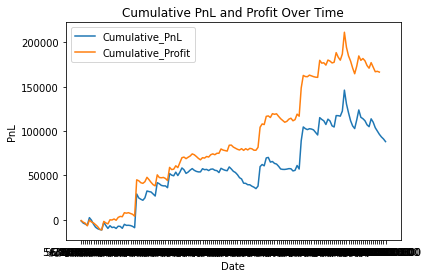

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"plt\",\"df4\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import matplotlib.pyplot as plt

# plot the Cumulative_Pnl and Cumulative_Profit columns against Date
plt.plot(df4['Date'], df4['Cumulative_PnL'], label='Cumulative_PnL')
plt.plot(df4['Date'], df4['Cumulative_Profit'], label='Cumulative_Profit')

# add x and y axis labels and a title
plt.xlabel('Date')
plt.ylabel('PnL')
plt.title('Cumulative PnL and Profit Over Time')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()

In [ ]:


pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"existing_csv_url\",\"new_csv_url\",\"existing_df\",\"new_df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd

# URL for the existing CSV file
existing_csv_url = 'https://raw.githubusercontent.com/alexbernal0/Data1/main/FM_Exisiting.csv'

# URL for the new CSV file
new_csv_url = 'https://raw.githubusercontent.com/alexbernal0/Data1/main/FM_New.csv'

# Read the existing CSV file into a dataframe
existing_df = pd.read_csv(existing_csv_url)

# Read the new CSV file into a dataframe
new_df = pd.read_csv(new_csv_url)

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"new_df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

new_df.head()

First Name 
 Last Name 
 Address 
 City 
 State 
 ZIP 
 
 
 
 
 0 
 NaN 
 NaN 
 2028 E 81ST ST 
 CHICAGO 
 CO 
 12468 
 
 
 1 
 NaN 
 NaN 
 5739 S BOND AVE 
 Anytown 
 CO 
 12468 
 
 
 2 
 NaN 
 NaN 
 591 N MOHAWK ST 
 CHICAGO 
 CO 
 13579 
 
 
 3 
 NaN 
 NaN 
 5993 S HOUSTON AVE 
 Anytown 
 CO 
 12468 
 
 
 4 
 NaN 
 NaN 
 631 N LA SALLE DR 
 CHICAGO 
 CO 
 13579

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"file_path\",\"df2\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# specify the file path
file_path = 'https://raw.githubusercontent.com/alexbernal0/QEP/main/CrudeData.txt'

# read in the data with comma delimiter
df2 = pd.read_csv(file_path, delimiter=',', usecols=['Date', 'Open','High','Low','Close'])

# convert the date format
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%Y-%m-%d')

# convert the 'date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# display the first few rows of the dataframe
df2.head()

Date 
 Open 
 High 
 Low 
 Close 
 
 
 
 
 0 
 2013-03-27 
 106.41 
 107.07 
 105.81 
 106.81 
 
 
 1 
 2013-03-28 
 106.91 
 107.58 
 106.49 
 107.46 
 
 
 2 
 2013-03-29 
 107.46 
 107.46 
 107.46 
 107.46 
 
 
 3 
 2013-04-01 
 107.59 
 108.03 
 106.15 
 107.30 
 
 
 4 
 2013-04-02 
 107.23 
 107.67 
 106.14 
 107.42

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df_joined3\",\"pd\",\"df2\",\"df_joined2\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# perform the left join on the 'Date' column
df_joined3 = pd.merge(df2, df_joined2, on='Date', how='left')

df_joined3.head(5000)

Date 
 Open 
 High 
 Low 
 Close 
 # 
 Signal 
 Price 
 Exit Date/Time 
 ExitPrice 
 Profit/Loss 
 Open_x 
 Open_y 
 
 
 
 
 0 
 2013-03-27 
 106.41 
 107.07 
 105.81 
 106.81 
 NaN 
 NaN 
 NaN 
 NaT 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 1 
 2013-03-28 
 106.91 
 107.58 
 106.49 
 107.46 
 NaN 
 NaN 
 NaN 
 NaT 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2 
 2013-03-29 
 107.46 
 107.46 
 107.46 
 107.46 
 NaN 
 NaN 
 NaN 
 NaT 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 3 
 2013-04-01 
 107.59 
 108.03 
 106.15 
 107.30 
 NaN 
 NaN 
 NaN 
 NaT 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 4 
 2013-04-02 
 107.23 
 107.67 
 106.14 
 107.42 
 NaN 
 NaN 
 NaN 
 NaT 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2519 
 2023-03-27 
 69.42 
 73.10 
 69.13 
 72.81 
 NaN 
 NaN 
 NaN 
 NaT 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2520 
 2023-03-28 
 72.86 
 73.93 
 72.19 
 73.20 
 NaN 
 NaN 
 NaN 
 NaT 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2521 
 2023-03-29 
 73.61 
 74.37 
 72.76 
 72.97 
 NaN 
 NaN 
 NaN 
 NaT 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2522 
 2023-03-30 
 72.98 
 74.63 
 72.61 
 74.37 
 NaN 
 NaN 
 NaN 
 NaT 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2523 
 2023-03-31 
 74.37 
 75.65 
 73.77 
 75.45 
 NaN 
 NaN 
 NaN 
 NaT 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 
 2524 rows × 13 columns

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df5\",\"df_joined3\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df5 = df_joined3[['Date','Open','High','Low','Close',"#",'Signal']]
df5

Date 
 Open 
 High 
 Low 
 Close 
 # 
 Signal 
 
 
 
 
 0 
 2013-03-27 
 106.41 
 107.07 
 105.81 
 106.81 
 NaN 
 NaN 
 
 
 1 
 2013-03-28 
 106.91 
 107.58 
 106.49 
 107.46 
 NaN 
 NaN 
 
 
 2 
 2013-03-29 
 107.46 
 107.46 
 107.46 
 107.46 
 NaN 
 NaN 
 
 
 3 
 2013-04-01 
 107.59 
 108.03 
 106.15 
 107.30 
 NaN 
 NaN 
 
 
 4 
 2013-04-02 
 107.23 
 107.67 
 106.14 
 107.42 
 NaN 
 NaN 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2519 
 2023-03-27 
 69.42 
 73.10 
 69.13 
 72.81 
 NaN 
 NaN 
 
 
 2520 
 2023-03-28 
 72.86 
 73.93 
 72.19 
 73.20 
 NaN 
 NaN 
 
 
 2521 
 2023-03-29 
 73.61 
 74.37 
 72.76 
 72.97 
 NaN 
 NaN 
 
 
 2522 
 2023-03-30 
 72.98 
 74.63 
 72.61 
 74.37 
 NaN 
 NaN 
 
 
 2523 
 2023-03-31 
 74.37 
 75.65 
 73.77 
 75.45 
 NaN 
 NaN 
 
 
 
 2524 rows × 7 columns

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"eratio_csv\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd

# URL for the existing CSV file
eratio_csv = 'https://raw.githubusercontent.com/alexbernal0/Data1/main/Eratio%20Test%20Dataset.csv'

# Read the existing CSV file into a dataframe
eratio_csv = pd.read_csv(eratio_csv)

eratio_csv.head()

Date 
 Open 
 High 
 Low 
 Close 
 # 
 Signal 
 
 
 
 
 0 
 2013-03-27 00:00:00 
 106.41 
 107.07 
 105.81 
 106.81 
 NaN 
 NaN 
 
 
 1 
 2013-03-28 00:00:00 
 106.91 
 107.58 
 106.49 
 107.46 
 NaN 
 NaN 
 
 
 2 
 2013-03-29 00:00:00 
 107.46 
 107.46 
 107.46 
 107.46 
 NaN 
 NaN 
 
 
 3 
 2013-04-01 00:00:00 
 107.59 
 108.03 
 106.15 
 107.30 
 NaN 
 NaN 
 
 
 4 
 2013-04-02 00:00:00 
 107.23 
 107.67 
 106.14 
 107.42 
 NaN 
 NaN

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"eratio_csv\",\"eratio_csv\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

eratio_csv['Signal'] = eratio_csv['Signal'].replace('Short', '')
eratio_csv

Date 
 Open 
 High 
 Low 
 Close 
 # 
 Signal 
 
 
 
 
 0 
 2013-03-27 00:00:00 
 106.41 
 107.07 
 105.81 
 106.81 
 NaN 
 NaN 
 
 
 1 
 2013-03-28 00:00:00 
 106.91 
 107.58 
 106.49 
 107.46 
 NaN 
 NaN 
 
 
 2 
 2013-03-29 00:00:00 
 107.46 
 107.46 
 107.46 
 107.46 
 NaN 
 NaN 
 
 
 3 
 2013-04-01 00:00:00 
 107.59 
 108.03 
 106.15 
 107.30 
 NaN 
 NaN 
 
 
 4 
 2013-04-02 00:00:00 
 107.23 
 107.67 
 106.14 
 107.42 
 NaN 
 NaN 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2519 
 2023-03-27 00:00:00 
 69.42 
 73.10 
 69.13 
 72.81 
 NaN 
 NaN 
 
 
 2520 
 2023-03-28 00:00:00 
 72.86 
 73.93 
 72.19 
 73.20 
 NaN 
 NaN 
 
 
 2521 
 2023-03-29 00:00:00 
 73.61 
 74.37 
 72.76 
 72.97 
 NaN 
 NaN 
 
 
 2522 
 2023-03-30 00:00:00 
 72.98 
 74.63 
 72.61 
 74.37 
 NaN 
 NaN 
 
 
 2523 
 2023-03-31 00:00:00 
 74.37 
 75.65 
 73.77 
 75.45 
 NaN 
 NaN 
 
 
 
 2524 rows × 7 columns

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"np\",\"buy_rows\",\"eratio_csv\",\"mfe_list\",\"day\",\"high_day_forward\",\"mfe_day\",\"mfe_df\",\"eratio_csv\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'eratio_csv'

# Filter rows with 'Buy' in the signal column
buy_rows = eratio_csv[eratio_csv['Signal'] == 'Buy']

# Calculate the rolling standard deviation of the price series with a window of 45 days
eratio_csv['price_std'] = eratio_csv['Close'].rolling(window=45).std()

# Initialize a list to store the MFE values for each day
mfe_list = []

# Iterate over each day from 1 to 25
for day in range(1, 26):
    # Shift the high column to get the high price for the specific day in the future
    high_day_forward = buy_rows['High'].shift(-day)
    
    # Calculate the MFE for the specific day in terms of standard deviations
    mfe_day = (high_day_forward - buy_rows['Close']) / eratio_csv['price_std']
    
    # Append the MFE values for the specific day to the list
    mfe_list.append(mfe_day)

# Create a DataFrame to store the MFE values for each day
mfe_df = pd.concat(mfe_list, axis=1)

# Set the column names of the MFE DataFrame
mfe_df.columns = [f'MFE Day {day}' for day in range(1, 26)]

# Concatenate the original DataFrame with the MFE DataFrame
eratio_csv = pd.concat([eratio_csv, mfe_df], axis=1)

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"buy_rows\",\"eratio_csv\",\"mae_list\",\"day\",\"low_day_forward\",\"mae_day\",\"mae_df\",\"eratio_csv\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Filter rows with 'Buy' in the signal column
buy_rows = eratio_csv[eratio_csv['Signal'] == 'Buy']

# Calculate the rolling standard deviation of the price series with a window of 45 days
eratio_csv['price_std'] = eratio_csv['Close'].rolling(window=45).std()

# Initialize a list to store the MAE values for each day
mae_list = []

# Iterate over each day from 1 to 25
for day in range(1, 26):
    # Shift the low column to get the low price for the specific day in the future
    low_day_forward = buy_rows['Low'].shift(-day)
    
    # Calculate the MAE for the specific day in terms of standard deviations
    mae_day = (buy_rows['Close'] - low_day_forward) / eratio_csv['price_std']
    
    # Append the MAE values for the specific day to the list
    mae_list.append(mae_day)

# Create a DataFrame to store the MAE values for each day
mae_df = pd.concat(mae_list, axis=1)

# Set the column names of the MAE DataFrame
mae_df.columns = [f'MAE Day {day}' for day in range(1, 26)]

# Concatenate the original DataFrame with the MAE DataFrame
eratio_csv = pd.concat([eratio_csv, mae_df], axis=1)

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"eratio_csv\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

eratio_csv

Date 
 Open 
 High 
 Low 
 Close 
 # 
 Signal 
 price_std 
 MFE Day 1 
 MFE Day 2 
 ... 
 MAE Day 16 
 MAE Day 17 
 MAE Day 18 
 MAE Day 19 
 MAE Day 20 
 MAE Day 21 
 MAE Day 22 
 MAE Day 23 
 MAE Day 24 
 MAE Day 25 
 
 
 
 
 0 
 2013-03-27 00:00:00 
 106.41 
 107.07 
 105.81 
 106.81 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 1 
 2013-03-28 00:00:00 
 106.91 
 107.58 
 106.49 
 107.46 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2 
 2013-03-29 00:00:00 
 107.46 
 107.46 
 107.46 
 107.46 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 3 
 2013-04-01 00:00:00 
 107.59 
 108.03 
 106.15 
 107.30 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 4 
 2013-04-02 00:00:00 
 107.23 
 107.67 
 106.14 
 107.42 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2519 
 2023-03-27 00:00:00 
 69.42 
 73.10 
 69.13 
 72.81 
 NaN 
 NaN 
 4.100086 
 NaN 
 NaN 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2520 
 2023-03-28 00:00:00 
 72.86 
 73.93 
 72.19 
 73.20 
 NaN 
 NaN 
 4.018936 
 NaN 
 NaN 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2521 
 2023-03-29 00:00:00 
 73.61 
 74.37 
 72.76 
 72.97 
 NaN 
 NaN 
 3.977464 
 NaN 
 NaN 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2522 
 2023-03-30 00:00:00 
 72.98 
 74.63 
 72.61 
 74.37 
 NaN 
 NaN 
 3.912322 
 NaN 
 NaN 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2523 
 2023-03-31 00:00:00 
 74.37 
 75.65 
 73.77 
 75.45 
 NaN 
 NaN 
 3.809289 
 NaN 
 NaN 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 
 2524 rows × 58 columns

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"eratio_csv\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

eratio_csv.dropna(how='any', inplace=True)
eratio_csv.head(100)

Date 
 Open 
 High 
 Low 
 Close 
 # 
 Signal 
 price_std 
 MFE Day 1 
 MFE Day 2 
 ... 
 MAE Day 16 
 MAE Day 17 
 MAE Day 18 
 MAE Day 19 
 MAE Day 20 
 MAE Day 21 
 MAE Day 22 
 MAE Day 23 
 MAE Day 24 
 MAE Day 25 
 
 
 
 
 51 
 2013-06-07 00:00:00 
 104.37 
 106.04 
 103.37 
 105.68 
 3.0 
 Buy 
 2.508595 
 0.605917 
 4.739706 
 ... 
 13.995884 
 13.553406 
 20.557327 
 20.254369 
 20.090931 
 27.318085 
 27.640975 
 25.253184 
 25.269129 
 24.491801 
 
 
 66 
 2013-06-28 00:00:00 
 106.19 
 107.20 
 105.71 
 105.94 
 5.0 
 Buy 
 1.578893 
 7.365918 
 6.821233 
 ... 
 21.698741 
 32.826788 
 32.345438 
 32.085762 
 43.568488 
 44.081505 
 40.287709 
 40.313043 
 39.078001 
 39.325009 
 
 
 89 
 2013-08-01 00:00:00 
 114.77 
 117.57 
 114.61 
 117.40 
 7.0 
 Buy 
 5.141837 
 -0.134193 
 -0.073904 
 ... 
 12.308831 
 12.161024 
 12.081286 
 15.607263 
 15.764794 
 14.599841 
 14.607620 
 14.228378 
 14.304227 
 13.462115 
 
 
 97 
 2013-08-13 00:00:00 
 115.66 
 116.71 
 115.07 
 116.34 
 9.0 
 Buy 
 4.567094 
 0.148891 
 -2.049443 
 ... 
 13.459324 
 13.369552 
 17.339253 
 17.516609 
 16.205053 
 16.213811 
 15.786844 
 15.872237 
 14.924151 
 15.051146 
 
 
 106 
 2013-08-26 00:00:00 
 116.56 
 117.02 
 115.21 
 115.57 
 11.0 
 Buy 
 3.655124 
 -2.350125 
 -2.396635 
 ... 
 16.494652 
 21.454811 
 21.676418 
 20.037623 
 20.048566 
 19.515069 
 19.621768 
 18.437130 
 18.595811 
 19.561579 
 
 
 176 
 2013-12-04 00:00:00 
 106.30 
 106.98 
 105.70 
 106.60 
 13.0 
 Buy 
 3.964402 
 0.052971 
 1.316718 
 ... 
 17.518407 
 17.722725 
 16.211778 
 16.221868 
 15.729991 
 15.828366 
 14.736146 
 14.882448 
 15.772872 
 16.413574 
 
 
 209 
 2014-01-23 00:00:00 
 105.66 
 106.81 
 105.38 
 106.29 
 15.0 
 Buy 
 2.463355 
 2.244906 
 3.008093 
 ... 
 28.396235 
 25.964592 
 25.980830 
 25.189227 
 25.347547 
 23.589782 
 23.825233 
 25.258238 
 26.289352 
 27.377300 
 
 
 253 
 2014-03-27 00:00:00 
 110.42 
 111.82 
 110.15 
 111.40 
 17.0 
 Buy 
 2.312761 
 0.994482 
 2.174889 
 ... 
 29.864732 
 29.882027 
 29.038879 
 29.207509 
 27.335288 
 27.586071 
 29.112384 
 30.210639 
 31.369427 
 30.400887 
 
 
 286 
 2014-05-14 00:00:00 
 112.96 
 113.70 
 112.88 
 113.42 
 19.0 
 Buy 
 1.942749 
 1.549351 
 -1.497877 
 ... 
 36.613063 
 35.609331 
 35.810077 
 33.581277 
 33.879823 
 35.696836 
 37.004261 
 38.383750 
 37.230745 
 36.391727 
 
 
 334 
 2014-07-23 00:00:00 
 115.05 
 116.43 
 114.88 
 116.21 
 21.0 
 Buy 
 1.796766 
 -3.172367 
 -3.489604 
 ... 
 40.055309 
 40.272366 
 37.862480 
 38.185282 
 40.149924 
 41.563575 
 43.055144 
 41.808460 
 40.901274 
 37.678817 
 
 
 364 
 2014-09-04 00:00:00 
 110.19 
 110.51 
 109.28 
 109.57 
 23.0 
 Buy 
 2.668195 
 0.138671 
 0.116183 
 ... 
 24.630884 
 23.008064 
 23.225439 
 24.548431 
 25.500385 
 26.504810 
 25.665291 
 25.054391 
 22.884385 
 22.790688 
 
 
 374 
 2014-09-18 00:00:00 
 109.16 
 109.94 
 108.15 
 108.32 
 25.0 
 Buy 
 2.622896 
 0.594762 
 -14.419174 
 ... 
 22.928851 
 23.149980 
 24.495821 
 25.464216 
 26.485987 
 25.631969 
 25.010519 
 22.803036 
 22.707721 
 20.389673 
 
 
 379 
 2014-09-25 00:00:00 
 109.23 
 109.88 
 108.39 
 108.87 
 27.0 
 Buy 
 2.078009 
 -18.464788 
 -19.677488 
 ... 
 29.484951 
 31.183693 
 32.406016 
 33.695712 
 32.617757 
 31.833353 
 29.047032 
 28.926725 
 26.000847 
 26.429142 
 
 
 468 
 2015-02-03 00:00:00 
 66.05 
 70.50 
 65.95 
 69.31 
 29.0 
 Buy 
 7.507877 
 -0.177147 
 -0.578060 
 ... 
 3.361803 
 3.700114 
 4.057073 
 3.758719 
 3.541614 
 2.770424 
 2.737125 
 1.927309 
 2.045851 
 2.059171 
 
 
 489 
 2015-03-05 00:00:00 
 67.20 
 67.98 
 66.19 
 66.34 
 31.0 
 Buy 
 2.545369 
 -0.538232 
 2.482940 
 ... 
 9.747112 
 10.800004 
 9.919975 
 9.279596 
 7.004877 
 6.906660 
 4.518008 
 4.867663 
 4.906950 
 3.720482 
 
 
 505 
 2015-03-27 00:00:00 
 64.60 
 64.97 
 61.80 
 62.46 
 33.0 
 Buy 
 2.990471 
 3.410834 
 3.541248 
 ... 
 7.895076 
 7.146031 
 6.600966 
 4.664816 
 4.581218 
 2.548093 
 2.845705 
 2

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"day\",\"mae_col\",\"mfe_col\",\"eratio_csv\",\"eratio_csv\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Create new columns for eRatio by subtracting MFE from MAE for each day
for day in range(1, 26):
    mae_col = f'MAE Day {day}'
    mfe_col = f'MFE Day {day}'
    eratio_csv[f'eRatio Day {day}'] = eratio_csv[mae_col].to_numpy() - eratio_csv[mfe_col].to_numpy()

# Drop the MFE and MAE columns
eratio_csv.drop(columns=[f'MFE Day {day}' for day in range(1, 26)] + [f'MAE Day {day}' for day in range(1, 26)], inplace=True)

eratio_csv.head(100)

Date 
 Open 
 High 
 Low 
 Close 
 # 
 Signal 
 price_std 
 eRatio Day 1 
 eRatio Day 2 
 ... 
 eRatio Day 16 
 eRatio Day 17 
 eRatio Day 18 
 eRatio Day 19 
 eRatio Day 20 
 eRatio Day 21 
 eRatio Day 22 
 eRatio Day 23 
 eRatio Day 24 
 eRatio Day 25 
 
 
 
 
 51 
 2013-06-07 00:00:00 
 104.37 
 106.04 
 103.37 
 105.68 
 3.0 
 Buy 
 2.508595 
 -0.617876 
 -8.299468 
 ... 
 2.715863e+01 
 26.560689 
 39.233123 
 39.819109 
 39.340753 
 53.484131 
 54.464759 
 49.645328 
 49.952272 
 48.297960 
 
 
 66 
 2013-06-28 00:00:00 
 106.19 
 107.20 
 105.71 
 105.94 
 5.0 
 Buy 
 1.578893 
 -12.857106 
 -12.603764 
 ... 
 4.252979e+01 
 62.664140 
 63.595171 
 62.835145 
 85.306579 
 86.864633 
 79.207371 
 79.695054 
 77.066631 
 77.364308 
 
 
 89 
 2013-08-01 00:00:00 
 114.77 
 117.57 
 114.61 
 117.40 
 7.0 
 Buy 
 5.141837 
 0.587339 
 0.499821 
 ... 
 2.369970e+01 
 23.985592 
 23.752212 
 30.652470 
 31.130898 
 28.779598 
 28.929350 
 28.122246 
 28.213653 
 26.731692 
 
 
 97 
 2013-08-13 00:00:00 
 115.66 
 116.71 
 115.07 
 116.34 
 9.0 
 Buy 
 4.567094 
 0.098531 
 4.379152 
 ... 
 2.653985e+01 
 26.277103 
 34.045719 
 34.584355 
 31.937157 
 32.105755 
 31.197081 
 31.299991 
 29.631534 
 29.843923 
 
 
 106 
 2013-08-26 00:00:00 
 116.56 
 117.02 
 115.21 
 115.57 
 11.0 
 Buy 
 3.655124 
 5.050444 
 5.184502 
 ... 
 3.241203e+01 
 42.118952 
 42.791980 
 39.484295 
 39.694958 
 38.559565 
 38.688152 
 36.603407 
 36.868788 
 38.928910 
 
 
 176 
 2013-12-04 00:00:00 
 106.30 
 106.98 
 105.70 
 106.60 
 13.0 
 Buy 
 3.964402 
 0.254767 
 -2.212188 
 ... 
 3.430783e+01 
 34.928348 
 31.878708 
 32.072936 
 31.026120 
 31.144675 
 29.222569 
 29.467247 
 31.366651 
 32.436169 
 
 
 209 
 2014-01-23 00:00:00 
 105.66 
 106.81 
 105.38 
 106.29 
 15.0 
 Buy 
 2.463355 
 -3.811875 
 -5.683307 
 ... 
 5.596027e+01 
 51.052331 
 51.364913 
 49.680218 
 49.871015 
 46.777672 
 47.171444 
 50.228251 
 51.949481 
 54.275578 
 
 
 253 
 2014-03-27 00:00:00 
 110.42 
 111.82 
 110.15 
 111.40 
 17.0 
 Buy 
 2.312761 
 -1.634410 
 -3.679584 
 ... 
 5.879552e+01 
 59.128450 
 57.334059 
 57.537279 
 54.242516 
 54.661928 
 57.917777 
 59.751083 
 62.228641 
 60.412630 
 
 
 286 
 2014-05-14 00:00:00 
 112.96 
 113.70 
 112.88 
 113.42 
 19.0 
 Buy 
 1.942749 
 -2.300863 
 3.628878 
 ... 
 7.246947e+01 
 70.333319 
 70.575244 
 66.652967 
 67.152259 
 71.028210 
 73.210684 
 76.160113 
 73.998228 
 72.258425 
 
 
 334 
 2014-07-23 00:00:00 
 115.05 
 116.43 
 114.88 
 116.21 
 21.0 
 Buy 
 1.796766 
 7.029298 
 7.975442 
 ... 
 7.915334e+01 
 79.414924 
 75.173970 
 75.713829 
 79.904693 
 82.264489 
 85.453553 
 83.116019 
 81.234861 
 74.706463 
 
 
 364 
 2014-09-04 00:00:00 
 110.19 
 110.51 
 109.28 
 109.57 
 23.0 
 Buy 
 2.668195 
 0.393524 
 0.326063 
 ... 
 4.850095e+01 
 45.645090 
 46.008632 
 48.830765 
 50.419854 
 52.567373 
 50.993275 
 49.726501 
 45.330271 
 45.356506 
 
 
 374 
 2014-09-18 00:00:00 
 109.16 
 109.94 
 108.15 
 108.32 
 25.0 
 Buy 
 2.622896 
 -0.621450 
 30.573072 
 ... 
 4.548026e+01 
 45.850076 
 48.720948 
 50.337482 
 52.522090 
 50.920806 
 49.632155 
 45.159999 
 45.186687 
 40.329462 
 
 
 379 
 2014-09-25 00:00:00 
 109.23 
 109.88 
 108.39 
 108.87 
 27.0 
 Buy 
 2.078009 
 39.119172 
 40.216376 
 ... 
 5.840205e+01 
 62.025712 
 64.066126 
 66.823573 
 64.802408 
 63.175851 
 57.531025 
 57.564712 
 51.433844 
 52.324119 
 
 
 468 
 2015-02-03 00:00:00 
 66.05 
 70.50 
 65.95 
 69.31 
 29.0 
 Buy 
 7.507877 
 0.592711 
 1.578342 
 ... 
 6.629038e+00 
 7.193778 
 7.956977 
 7.397564 
 6.947370 
 5.385011 
 5.394335 
 3.697450 
 3.943858 
 3.871934 
 
 
 489 
 2015-03-05 00:00:00 
 67.20 
 67.98 
 66.19 
 66.34 
 31.0 
 Buy 
 2.545369 
 2.321863 
 -4.144782 
 ... 
 1.888527e+01 
 21.136422 
 19.486366 
 18.158465 
 13.550096 
 13.577597 
 8.572430 
 9.299240 
 9.087090 
 6.537362 
 
 
 505 
 2015-03-27 00:00:00 
 64.60 
 64.97 
 61.80 
 62.46 
 33.0 
 Buy 
 2.990471 
 -6.122781 
 -6.6243

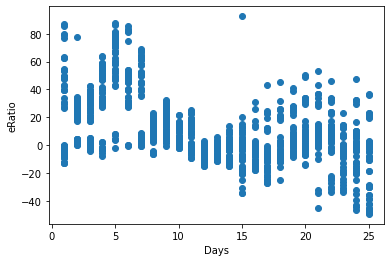

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"plt\",\"np\",\"eratio_columns\",\"eratio_data\",\"x\",\"y\",\"eratio_csv\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import matplotlib.pyplot as plt
import numpy as np

# Get the 25 eRatio columns
eratio_columns = [f'eRatio Day {day}' for day in range(1, 26)]

# Create a dataframe for the eRatio values
eratio_data = eratio_csv[eratio_columns]

# Generate x-coordinates for the scatter plot
x = np.repeat(range(1, 26), eratio_data.shape[0])

# Generate y-coordinates for the scatter plot
y = eratio_data.values.flatten()

# Create a dot plot
plt.scatter(x, y, marker='o')

# Set the x-axis label
plt.xlabel('Days')

# Set the y-axis label
plt.ylabel('eRatio')

# Show the plot
plt.show()


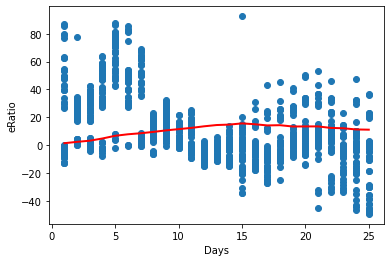

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"plt\",\"np\",\"eratio_columns\",\"eratio_data\",\"x\",\"y\",\"average_eratio\",\"eratio_csv\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import matplotlib.pyplot as plt
import numpy as np

# Get the 25 eRatio columns
eratio_columns = [f'eRatio Day {day}' for day in range(1, 26)]

# Create a dataframe for the eRatio values
eratio_data = eratio_csv[eratio_columns]

# Generate x-coordinates for the scatter plot
x = np.repeat(range(1, 26), eratio_data.shape[0])

# Generate y-coordinates for the scatter plot
y = eratio_data.values.flatten()

# Compute the average eRatio for each day
average_eratio = eratio_data.mean()

# Create a dot plot
plt.scatter(x, y, marker='o')

# Plot a line for the average eRatio for each day
plt.plot(range(1, 26), average_eratio, color='red', linewidth=2)

# Set the x-axis label
plt.xlabel('Days')

# Set the y-axis label
plt.ylabel('eRatio')

# Show the plot
plt.show()


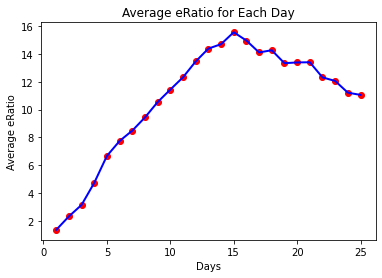

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"plt\",\"average_eratio\",\"eratio_csv\",\"eratio_columns\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import matplotlib.pyplot as plt

# Compute the average eRatio for each day
average_eratio = eratio_csv[eratio_columns].mean()

# Plot a line for the average eRatio for each day
plt.plot(range(1, 26), average_eratio, color='blue', linewidth=2)

# Add dots on the line for each day
plt.scatter(range(1, 26), average_eratio, color='red', marker='o')

# Set the x-axis label
plt.xlabel('Days')

# Set the y-axis label
plt.ylabel('Average eRatio')

# Set the plot title
plt.title('Average eRatio for Each Day')

# Show the plot
plt.show()